## Importing Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Scraping The F1 Championship Data From Wikipedia

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_Formula_One_World_Drivers%27_Champions'
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36'
}
page = requests.get(url, headers=headers)

In [3]:
F1_data= BeautifulSoup(page.text, 'html.parser')

In [4]:
table = F1_data.select_one("table.wikitable.sortable.sticky-header-multi")

In [5]:
rows = table.find_all('tr')

In [6]:
F1_table = []
for row in rows:
    cols = row.find_all(['th','td'])
    text = [col.get_text(strip = True) for col in cols]
    if len(text) ==16:
        F1_table.append(text)
    



In [7]:
header = [
    "Season", "Driver", "Age",
    "Chassis", "Engine", "Tyres",
    "Poles", "Wins", "Podiums", "Fastest_laps",
    "Points", "Points_percent",
    "Clinched", "Rounds_remaining",
    "Margin", "Margin_percent"
]

In [8]:
F1_df = pd.DataFrame(F1_table, columns = header)
F1_df

,Season,Driver,Age,Chassis,Engine,Tyres,Poles,Wins,Podiums,Fastest_laps,Points,Points_percent,Clinched,Rounds_remaining,Margin,Margin_percent
0,1950,Giuseppe Farina[22],44,Alfa Romeo,Alfa Romeo,P,2,3,3,3,30,83.333 (47.619),Round 7 of 7,0,3,10.000
1,1951,Juan Manuel Fangio[23],40,Alfa Romeo,Alfa Romeo,P,4,3,5,5,31,86.111 (51.389),Round 8 of 8,0,6,19.355
2,1952[a],Alberto Ascari[25],34,Ferrari,Ferrari,FP,5,6,6,6,36,100.000 (74.306),Round 6 of 8,2,12,33.333
3,1953[a],Alberto Ascari[25],35,Ferrari,Ferrari,P,6,5,5,4,34.5,95.833 (57.407),Round 8 of 9,1,6.5,18.841
4,1954,Juan Manuel Fangio[23],43,Maserati[b],Maserati,P,5,6,7,3,42,93.333 (70.547),Round 7 of 9,2,16.857,40.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2022,Max Verstappen[57],25,Red Bull,RBPT,P,7,15,17,5,454,76.174,Round 18 of 22,4,146,32.159
73,2023,Max Verstappen[58],26,Red Bull,Honda RBPT,P,12,19,21,9,575,92.742,Round 17 of 22,5,290,50.435
74,2024,Max Verstappen[59],27,Red Bull,Honda RBPT,P,8,9,14,3,437,65.030,Round 22 of 24,2,63,14.416
75,2025,Lando Norris[60],26,McLaren,Mercedes,P,7,7,18,6,423,65.278,Round 24 of 24,0,2,0.473


In [9]:
F1_df.describe()

,Season,Driver,Age,Chassis,Engine,Tyres,Poles,Wins,Podiums,Fastest_laps,Points,Points_percent,Clinched,Rounds_remaining,Margin,Margin_percent
count,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
unique,77,38,22,18,15,11,17,15,17,12,63,76,45,8,44,74
top,1950,Michael Schumacher[46],34,Ferrari,Ferrari,G,2,5,6,3,42,73.737 (52.778),Round 16 of 16,0,1,10.000
freq,1,7,9,15,15,24,8,13,9,15,4,2,9,31,8,2


## Understaning The Data

In [10]:
F1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            77 non-null     object
 1   Driver            77 non-null     object
 2   Age               77 non-null     object
 3   Chassis           77 non-null     object
 4   Engine            77 non-null     object
 5   Tyres             77 non-null     object
 6   Poles             77 non-null     object
 7   Wins              77 non-null     object
 8   Podiums           77 non-null     object
 9   Fastest_laps      77 non-null     object
 10  Points            77 non-null     object
 11  Points_percent    77 non-null     object
 12  Clinched          77 non-null     object
 13  Rounds_remaining  77 non-null     object
 14  Margin            77 non-null     object
 15  Margin_percent    77 non-null     object
dtypes: object(16)
memory usage: 9.8+ KB


In [11]:
F1_df.memory_usage()

Index               132
Season              616
Driver              616
Age                 616
Chassis             616
Engine              616
Tyres               616
Poles               616
Wins                616
Podiums             616
Fastest_laps        616
Points              616
Points_percent      616
Clinched            616
Rounds_remaining    616
Margin              616
Margin_percent      616
dtype: int64

**Cleaning Driver Column**

In [12]:
F1_df['Driver'] = F1_df['Driver'].str.replace(r"\[.*?\]", "", regex=True).str.strip()  #removes side brackets in drivers name.

## Which drivers have won the most championships?

In [13]:
Driver_count = F1_df.groupby('Driver').size().sort_values(ascending=False)

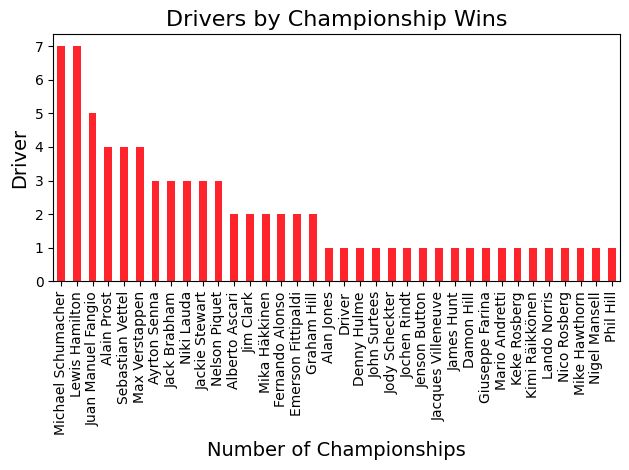

In [14]:
Driver_count.plot(kind='bar', color = '#ff232b')
plt.title("Drivers by Championship Wins", fontsize=16)
plt.xlabel("Number of Championships", fontsize=14)
plt.ylabel("Driver", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Drivers by Championship Wins - Key Observations**

* *Michael Schumacher (7) and Lewis Hamilton (7)* are the clear leaders - each has seven world championships.

* *Juan Manuel Fangio (5)* holds third place with five titles.

* A group of drivers each have four championships - based on your chart these include *Alain Prost, Sebastian Vettel, and Max Verstappen (4 each)*.

* Several historic champions have three titles (e.g., Ayrton Senna, Niki Lauda, Jackie Stewart - shown as a three-title group on the chart).

* Many drivers have one or two championships, forming a long tail that shows single-season breakthroughs or short-term dominance.

* Takeaway: sustained multi-season dominance is rare: only a handful of drivers (two at 7, one at 5, and a few at 4) sit in the elite multi-title tier - the rest are concentrated at one-to-three titles.

## Which constructor (chassis) has won the most championships?

In [15]:
Constructor_count = F1_df.groupby("Chassis").size().sort_values(ascending=False)

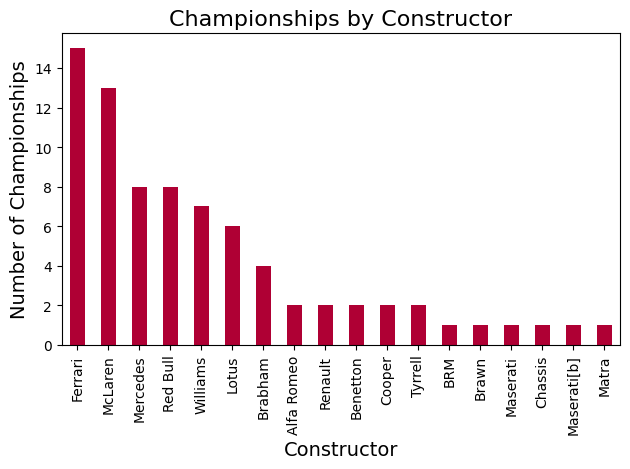

In [16]:
Constructor_count.plot(kind='bar', color = '#af0034')
plt.title("Championships by Constructor", fontsize=16)
plt.xlabel("Constructor", fontsize=14)
plt.ylabel("Number of Championships", fontsize=14)
plt.tight_layout()
plt.show()

**Constructors' Championship Wins - Key Observation**

*Ferrari* has the highest number of championships *(15)*, making it the most successful constructor in your dataset.

*McLaren (13)* follows as the second-most successful constructor.

*Mercedes (8) and Red Bull (8)* are tied, showing that both teams have achieved comparable total success in terms of championship count.

*Williams (7) and Lotus (6)* are strong mid-tier performers with several championships each.

After the top six constructors, the totals drop significantly — *Brabham (4), Alfa Romeo (2), Renault (2), Benetton (2)*, and others fall into a lower-championship bracket.

Several constructors have only one championship, highlighting how hard it is for most teams to reach the top more than once.

Overall pattern: The distribution is heavily top-loaded — only a few teams account for a large majority of championships, while most constructors have very few.


## Which tyre manufacturer dominated the most championships?

In [17]:
F1_df = F1_df[~F1_df['Tyres'].isin(['FP','MG','Tyres'])]
Tyres_type = F1_df.groupby("Tyres").size().sort_values(ascending=False)
Tyres_type

Tyres
G    24
P    20
B    11
D     8
M     5
F     3
E     2
C     1
dtype: int64

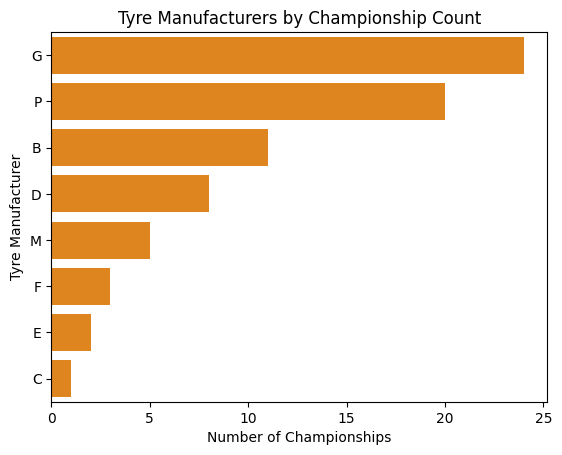

In [18]:
sns.barplot(x=Tyres_type.values, y=Tyres_type.index, color = '#ff8700')
plt.title("Tyre Manufacturers by Championship Count")
plt.xlabel("Number of Championships")
plt.ylabel("Tyre Manufacturer")
plt.show()

*Goodyear (“G”)* is the most dominant tyre manufacturer in the dataset with *24* championships, clearly leading all competitors.

*Pirelli (“P”)* follows with *20* championships, placing it as the second-most successful tyre supplier.

*Bridgestone (“B”)* ranks next with *11* championships, forming a solid mid-tier group.

*Dunlop (“D”)* holds *8* championships, showing a moderate level of success.

*Michelin (“M”), Firestone (“F”), Englebert (“E”), and Continental (“C”*) appear with much lower counts, ranging from *1 to 5* championships.

The overall distribution shows a steep dominance gap, with the top two manufacturers (*Goodyear and Pirelli*) accounting for the majority of championships.

Takeaway: Only a few tyre suppliers have achieved widespread championship success, while most have had limited impact.

## Which engine manufacturer has the highest number of championships?

In [19]:
Engine_type = F1_df.groupby("Engine").size().sort_values(ascending=False)

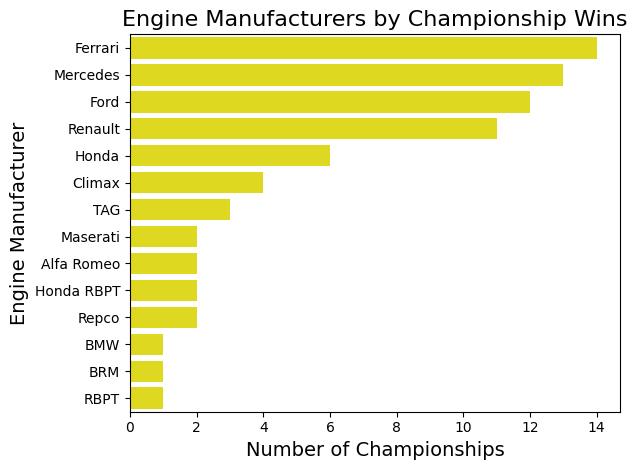

In [20]:
sns.barplot(x=Engine_type.values, y=Engine_type.index, color = '#fff500')
plt.title("Engine Manufacturers by Championship Wins", fontsize=16)
plt.xlabel("Number of Championships", fontsize=14)
plt.ylabel("Engine Manufacturer", fontsize=14)
plt.tight_layout()
plt.show()

*Ferrari leads all engine manufacturers with 14 championships*, making it the most successful engine supplier in the dataset.

*Mercedes* follows closely with *13 championships*, placing it near the top of the historical leaderboard.

*Ford (Cosworth) holds 12 championships*, showing strong performance across multiple seasons.

*Renault appears with 11 championships*, forming a highly competitive top-four group.

Mid-tier engine suppliers include:

*Honda – 6 championships*

*Climax – 4 championships*

*TAG – 3 championships*

*Maserati, Alfa Romeo, Honda RBPT – 2 championships each*

Several manufacturers — *Repco, BMW, BRM, RBPT* — show *single-championship* contributions, indicating isolated peaks rather than sustained dominance.

Takeaway: Only a handful of engine manufacturers account for the majority of championships, forming a clear dominance tier (Ferrari, Mercedes, Ford, Renault), while the rest show significantly smaller contributions.

## Are pole positions related to winning the championship?

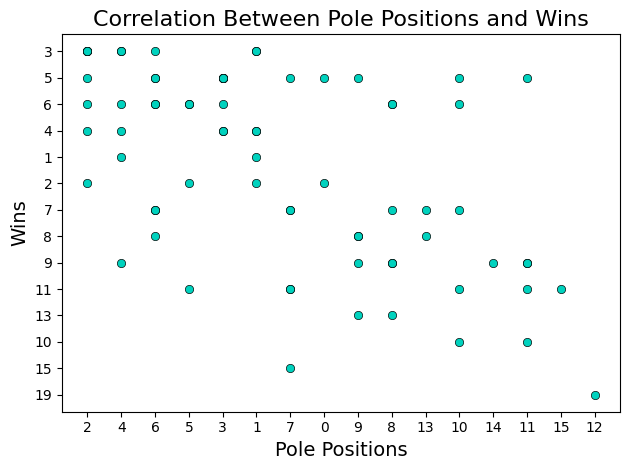

In [21]:
sns.scatterplot(data=F1_df, x="Poles", y="Wins", color="#00d2be", edgecolor="black")
plt.title("Correlation Between Pole Positions and Wins", fontsize=16)
plt.xlabel("Pole Positions", fontsize=14)
plt.ylabel("Wins", fontsize=14)
plt.tight_layout()
plt.show()


The scatter plot shows a moderate upward trend: drivers with more pole positions generally achieve more wins in the season they became champion.

There is no strict linear relationship - several champions achieved high win totals with relatively few poles, indicating strong race-day performance even without dominating qualifying.

Likewise, some seasons show high pole counts but moderate win totals, meaning pole position does not guarantee race victories.

The spread of points suggests that while poles help, race pace, consistency, strategy, and reliability are also major factors in securing championship wins.

In [22]:
F1_df['Margin'] = pd.to_numeric(F1_df['Margin'], errors='coerce')
F1_df['Wins'] = pd.to_numeric(F1_df['Wins'], errors='coerce')

C:\Users\DELL\AppData\Local\Temp\ipykernel_7828\2364610791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F1_df['Margin'] = pd.to_numeric(F1_df['Margin'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_7828\2364610791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F1_df['Wins'] = pd.to_numeric(F1_df['Wins'], errors='coerce')


In [23]:
corr = F1_df[['Margin', 'Wins','Poles']].corr()
corr

,Margin,Wins,Poles
Margin,1.000000,0.802022,0.449312
Wins,0.802022,1.000000,0.662257
Poles,0.449312,0.662257,1.000000


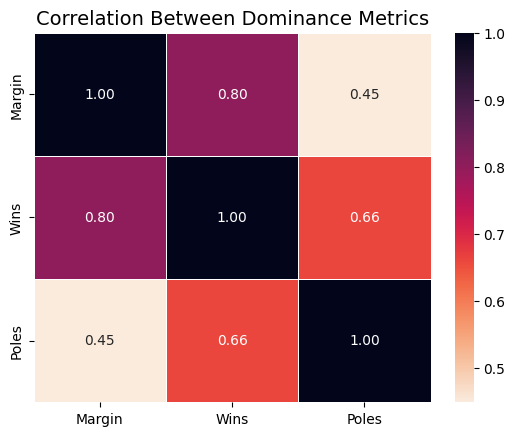

In [24]:
sns.heatmap(
    corr, 
    annot=True, 
    cmap="rocket_r", 
    fmt=".2f",
    linewidths=.5
)
plt.title("Correlation Between Dominance Metrics", fontsize=14)
plt.show()

*Wins ↔ Poles: 0.66*
→ A moderate positive correlation. More poles tend to align with more wins, but not perfectly.

*Margin ↔ Wins: 0.80*
→ Wins have a much stronger relationship with how comfortably a driver wins the title.

*Margin ↔ Poles: 0.45*
→ Poles alone do not strongly predict season dominance or final margins.

**Interpretation:**

Pole positions contribute to championship success - faster qualifying often leads to better race outcomes — but they are not the primary determinant.

The strongest indicator of dominance is wins, not poles, as shown by the stronger correlation between Wins ↔ Margin.

The data supports a realistic F1 pattern:

Some champions rely on race craft and consistency rather than qualifying.

Others convert poles into wins effectively, creating more dominant seasons.